## Étape: 02 - Exploration et transformation de données ( Les utilisateurs d'Airbnb USA)

En basant sur l'EDA et le rapport de profil, nous procédons à l'application de la transformation des données

### Cycle de transformation de données

> 1. Importer les bibliothèques et charger les données
> 2. Conversion de type/format 
> 3. Remplacement de valeurs manquantes / Correction & Suppression de valeurs aberrantes
> 4. Correction/Standardisation/Normalisation de données
> 5. Appliquer les transformations effectuées sur les données de train sur les données de test 

## 1) Importer les bibliothèques et charger les données

In [1]:
# Importer les Bibliothèques
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# description du projet
# https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data

# lecture de la base données
df_train = pd.read_csv('train_users_2 - train_users_2.csv')
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## 2) Conversion de type/format

In [3]:
# Afficher les informations sur la base de données, y compris le shape, le type et le nom de descripteur de chaque colonne, 
# les valeurs non nulles et l'utilisation de la mémoire.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

#### Vérification de la présence des duplications

In [4]:
# Afficher les doublons s'ils existent !
df_train[df_train[['id']].duplicated() == True]


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


On peut déduire du resultat, qu'il n'y a pas de doublons dans nos données

De plus, on remarque que les valeurs de descripteur $id$ sont des identifiants uniques pour chaque utilisateur. Je propose de les supprimer, car elles ne donnent pas d'informations utiles.

#### supprimer 'id'

In [5]:
# Drope 'id'
df_train = df_train.drop(columns=["id"], axis = 1)

#### Converter les dates  (objets vers dates): date_account_created, timestamp_first_active, date_first_booking

In [6]:
# Converter le type objet vers date
df_train['date_account_created'] = pd.to_datetime(df_train['date_account_created'], format='%Y-%m-%d')
df_train['timestamp_first_active'] = pd.to_datetime(df_train['timestamp_first_active'], format='%Y%m%d%H%M%S')
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'], format='%Y-%m-%d')

# Vérifier la conversion de types date
column_dates = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
df_train[column_dates].dtypes

date_account_created      datetime64[ns]
timestamp_first_active    datetime64[ns]
date_first_booking        datetime64[ns]
dtype: object

#### Dans l'étape de remplacement des valeurs manquantes, nous convertirons l'âge (float vers int)

## 3) Remplacement de valeurs manquantes / Correction & Suppression de valeurs aberrantes

In [7]:
# Afficher le nom de la variable et le pourcentage et le total de valeurs manquantes
features_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1]
 
for feature in features_nan:
    print(feature, ': ',np.round(df_train[feature].isnull().mean()*100, 2), '% /', 
          df_train[feature].isnull().sum(),' valeurs manquantes ', '\n')  

date_first_booking :  58.35 % / 124543  valeurs manquantes  

age :  41.22 % / 87990  valeurs manquantes  

first_affiliate_tracked :  2.84 % / 6065  valeurs manquantes  



#### Note: 
Dans notre processus de remplacement des valeurs manquantes, on commence par les descripteurs avec moins de valeurs manquantes.

### 3.1) first_affiliate_tracked

Etudier la tendance des valeurs manquantes par rapport a la cible

Text(0.5, 1.0, 'Nan-first_affiliate_tracked =0 / Value-first_affiliate_tracked =1 la distribution de first_affiliate_tracked pour chaque classe de "country_destination" ')

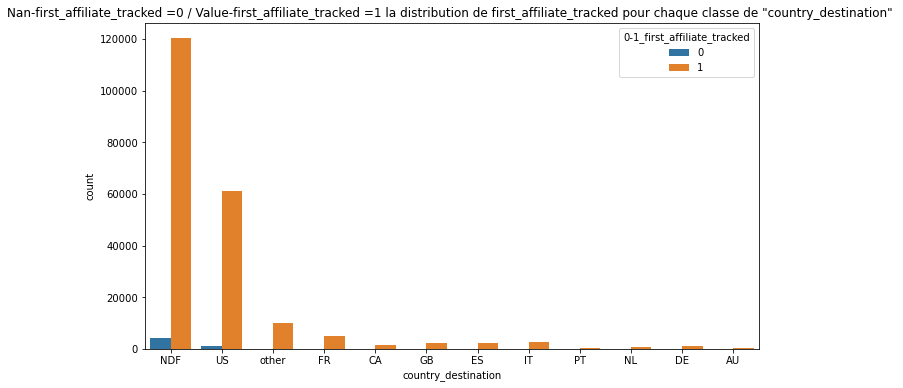

In [8]:
# la distribution de first_affiliate_tracked pour chaque classe de "country_destination" (Nan-num_of_doors =0 / Value-num_of_doors =1) 

df = df_train.copy()
df['0-1_first_affiliate_tracked'] = df['first_affiliate_tracked'].isnull().map(lambda x : 0 if x == True else 1)
fig = plt.figure(figsize=(11,6))
ax = sns.countplot(df['country_destination'],hue=df['0-1_first_affiliate_tracked'])
ax.set_title('Nan-first_affiliate_tracked =0 / Value-first_affiliate_tracked =1 la distribution de first_affiliate_tracked pour chaque classe de "country_destination" ',fontsize = 12)

In [9]:
# Le totale du catégories manquantes de first_affiliate_tracked dans chaque country_destination
for var in df["country_destination"].unique():
    res = df[df["country_destination"]== var]
    print("Le total du valeurs manquantes de first_affiliate_tracked dans ", var ,
          ":", res["first_affiliate_tracked"].isnull().sum())

Le total du valeurs manquantes de first_affiliate_tracked dans  NDF : 4327
Le total du valeurs manquantes de first_affiliate_tracked dans  US : 1309
Le total du valeurs manquantes de first_affiliate_tracked dans  other : 113
Le total du valeurs manquantes de first_affiliate_tracked dans  FR : 124
Le total du valeurs manquantes de first_affiliate_tracked dans  CA : 37
Le total du valeurs manquantes de first_affiliate_tracked dans  GB : 29
Le total du valeurs manquantes de first_affiliate_tracked dans  ES : 36
Le total du valeurs manquantes de first_affiliate_tracked dans  IT : 44
Le total du valeurs manquantes de first_affiliate_tracked dans  PT : 3
Le total du valeurs manquantes de first_affiliate_tracked dans  NL : 11
Le total du valeurs manquantes de first_affiliate_tracked dans  DE : 20
Le total du valeurs manquantes de first_affiliate_tracked dans  AU : 12


#### Cas : MCAR
On remarque que les valeurs manquantes sont réparties de manière aléatoire et il n'y a aucune tendance particulière dans les positions du valeurs manquantes. Mais, la plupart sont présentes dans les demandes de réservations NDF et US.

In [10]:
# la catégorie la plus fréquente de first_affiliate_tracked dans chaque country_destination
for var in df["country_destination"].unique():
    res = df[df["country_destination"]== var]
    print("la valeur la plus fréquentes pour ", var ,
          ":", res["first_affiliate_tracked"].mode()[0])

la valeur la plus fréquentes pour  NDF : untracked
la valeur la plus fréquentes pour  US : untracked
la valeur la plus fréquentes pour  other : untracked
la valeur la plus fréquentes pour  FR : untracked
la valeur la plus fréquentes pour  CA : untracked
la valeur la plus fréquentes pour  GB : untracked
la valeur la plus fréquentes pour  ES : untracked
la valeur la plus fréquentes pour  IT : untracked
la valeur la plus fréquentes pour  PT : untracked
la valeur la plus fréquentes pour  NL : untracked
la valeur la plus fréquentes pour  DE : untracked
la valeur la plus fréquentes pour  AU : untracked


On remarque que la catégorie $"untracked"$ est la plus fréquente dans tout les catégories de first_affiliate_tracked.
Selon cette analyse, on propose de remplacer les catégories manquantes par $"untracked"$. 

#### Remplacement les catégories manquantes par "𝑢𝑛𝑡𝑟𝑎𝑐𝑘𝑒𝑑"

In [11]:
# Remplacer les valeurs manquantes (Cat) de first_affiliate_tracked par "untracked"
index = df_train[df_train.first_affiliate_tracked.isnull()].index
df_train.loc[index, "first_affiliate_tracked"] = 'untracked'

# Vérifiez si le remplacement des valeurs manquantes (cat) a bien fonctionné !
print("le Total du valeurs manqantes dans first_affiliaDte_tracked égale ", 
      df_train["first_affiliate_tracked"].isnull().sum())

le Total du valeurs manqantes dans first_affiliaDte_tracked égale  0


### 3.2) age

Avant le remplacement des valeurs manquantes, je propose de supprimer les échantillons ou les valeurs de l'age est plus de 90 ans, et aussi les échantillons avec l'age moins de 18 ans, car; l'application Airbnb et les services sont destinés uniquement aux personnes âgées de 18 ans ou plus.

In [12]:
# Le Totale et le pourcentage des échantillons ou (18 > age > 90) par rapport au total des échantillons.  
df_manip = df_train.copy()

age_sup_90 = df_manip[df_manip['age'] > 90].shape[0]
age_inf_18 = df_manip[df_manip['age'] < 18].shape[0]
age_total = df_manip['age'].shape[0]
print(" Le totale des échantillons avec l'age plus de 90:     ", age_sup_90)
print(" Le totale des échantillons avec l'age moins de 18:    ", age_inf_18)
print(" Le totale des échantillons avec l'age (18 > age > 90):", age_sup_90 + age_inf_18)
print(" Le pourcentage des échantillons ou (18 > age >  90):  ",
      np.round(((age_sup_90 + age_inf_18)/ age_total)*100, 2), "%")

 Le totale des échantillons avec l'age plus de 90:      2543
 Le totale des échantillons avec l'age moins de 18:     158
 Le totale des échantillons avec l'age (18 > age > 90): 2701
 Le pourcentage des échantillons ou (18 > age >  90):   1.27 %


Notez que les échantillons avec des valeurs aberrantes (âge) ne représentent que 1,27%

#### Suppression de valeurs aberrantes " les échantillons  (18 > age >  90) " 

In [13]:
# Suppression de valeurs aberrantes " les échantillons (18 > age > 90)" 
df_train = df_train.loc[((df_manip['age'] > 18) & (df_manip['age'] < 90))|(df_manip['age'].isnull())]

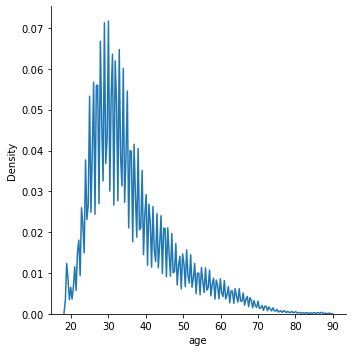

In [14]:
# tracer l'histogramme age
sns.displot(df_train, x="age", kind="kde", bw_adjust=.25)

#### Etudier la tendance des valeurs manquantes par rapport à la cible

Text(0.5, 1.0, 'Nan-age =0 / Value-age =1 la distribution de age pour chaque classe de "country_destination" ')

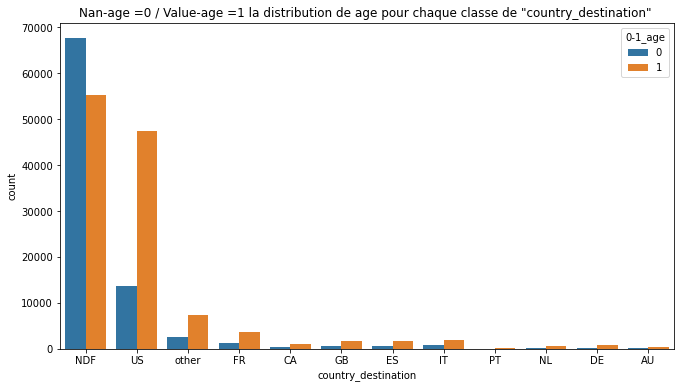

In [15]:
# la distribution de l'age pour chaque classe de "country_destination" (Nan-age =0 / Value-age =1) 

df = df_train.copy()
df['0-1_age'] = df['age'].isnull().map(lambda x : 0 if x == True else 1)
fig = plt.figure(figsize=(11,6))
ax = sns.countplot(df['country_destination'],hue=df['0-1_age'])
ax.set_title('Nan-age =0 / Value-age =1 la distribution de age pour chaque classe de "country_destination" ',fontsize = 12)

#### Cas MAR:
On remarque que la plus de part des valeurs sont présentes dans les demandes de réservations NDF (plus de 80% de Total des Nan dans age).

In [16]:
# Décrire toutes les propriétés statistiques de l'age (pour chaque destination) sans les valeurs abérantes
for var in df["country_destination"].unique():
    res = df[df["country_destination"]== var]
    print("les propriétés statistiques de l'age selon ", var ,
          ":", res["age"].describe(), "\n")

les propriétés statistiques de l'age selon  NDF : count    55311.000000
mean        37.020520
std         11.777097
min         19.000000
25%         28.000000
50%         34.000000
75%         43.000000
max         89.000000
Name: age, dtype: float64 

les propriétés statistiques de l'age selon  US : count    47394.00000
mean        35.99348
std         10.77716
min         19.00000
25%         28.00000
50%         33.00000
75%         41.00000
max         89.00000
Name: age, dtype: float64 

les propriétés statistiques de l'age selon  other : count    7350.000000
mean       36.305170
std        11.072544
min        19.000000
25%        29.000000
50%        33.000000
75%        41.000000
max        88.000000
Name: age, dtype: float64 

les propriétés statistiques de l'age selon  FR : count    3626.000000
mean       37.398787
std        11.824176
min        19.000000
25%        29.000000
50%        34.000000
75%        44.000000
max        84.000000
Name: age, dtype: float64 

les prop

Nous notons que l'âge moyen dans tous les groupes se situe entre 35-38 ans et pour la médiane entre 32-35 ans.

Tant que les valeurs aberrantes sont supprimées, nous pouvons remplacer les valeurs manquantes par l'age le plus fréquent (mode) de chaque destination au lieu de  la moyenne ou du median, 

#### Problème !! (manque de la cible dans les données du test) !!

#### Solution  proposée: 

Problème et solution:
Dans nos données de test, nous manquons la cible (country_destination), donc, au plus tard, nous ne pouvons pas appliquer la même idée sur nos données de test. Comme solution, je suggère de remplacer toutes les valeurs manquantes par l'âge (mode) le plus fréquent dans le train de données. 

#### Remplacement des valeurs manquantes de l'age par le mode et changer le type de l'Age (float vers int) 

In [17]:
# Remplacer les valeurs manquantes de l'age par le mode 
df_train["age"].fillna(df_train["age"].mode()[0], axis= 0, inplace=True)

#Converter l'Age (float vers int32)  
df_train["age"] = df_train["age"].astype(np.int32) 

In [18]:
# Vérifiez si le remplacement des valeurs manquantes a bien fonctionné !
print("le Total du valeurs manqantes dans age égale ", 
      df_train["age"].isnull().sum())

# Les valeurs unique (Age)
df_train["age"].unique()

le Total du valeurs manqantes dans age égale  0


array([30, 38, 56, 42, 41, 46, 47, 50, 36, 37, 33, 31, 29, 40, 26, 32, 35,
       59, 49, 44, 34, 28, 19, 53, 52, 39, 57, 25, 54, 69, 63, 43, 55, 65,
       58, 61, 27, 45, 60, 48, 51, 64, 72, 70, 67, 73, 66, 68, 24, 75, 79,
       62, 23, 76, 74, 87, 71, 84, 78, 82, 77, 22, 89, 21, 20, 86, 81, 88,
       80, 83, 85], dtype=int32)

### 3.3) date_first_booking

Les dates manquantes de "date_first_booking" sont difficiles à remplacer, car nous ne pouvons pas prédire la date de réservation sur la base des valeurs non manquantes dans le descripteur, ou en se basant sur les autres descripteurs

Au lieu de supprimer les échantillons (date_first_booking = Nan ) et nous risquons de changer la distribution de probabilité de nos descripteurs. Je suggère de supprimer ce descripteur surtout avec la présence de plusieurs valeurs manquantes (environ de 60%) dans le data du train et 100% dans le data du test.

#### supprimer 'date_first_booking'

In [19]:
# Drope 'date_first_booking'
df_train = df_train.drop(columns=["date_first_booking"], axis = 1, )

# reset index
df_train = df_train.reset_index(drop=True)

In [20]:
# Afficher les informations sur la base de données, y compris le shape, le type et le nom de descripteur de chaque colonne, 
# les valeurs non nulles et l'utilisation de la mémoire.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210063 entries, 0 to 210062
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date_account_created     210063 non-null  datetime64[ns]
 1   timestamp_first_active   210063 non-null  datetime64[ns]
 2   gender                   210063 non-null  object        
 3   age                      210063 non-null  int32         
 4   signup_method            210063 non-null  object        
 5   signup_flow              210063 non-null  int64         
 6   language                 210063 non-null  object        
 7   affiliate_channel        210063 non-null  object        
 8   affiliate_provider       210063 non-null  object        
 9   first_affiliate_tracked  210063 non-null  object        
 10  signup_app               210063 non-null  object        
 11  first_device_type        210063 non-null  object        
 12  first_browser   

## 4) Correction/Standardisation/Normalisation de données 

#### Standardisation/Normalisation des descripteurs $age$ et $signupflow$

In [21]:
# Création un dataframe pour les 2 series "age" et "signup_flow"
df_normal = pd.DataFrame({'age_norm': df_train["age"],
                          'signup_flow_norm': df_train["signup_flow"]
                         })

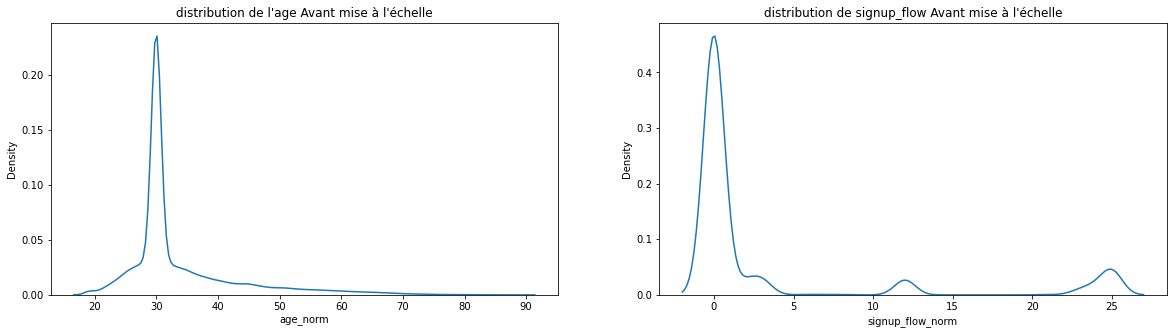

In [22]:
# Plots (avant mise à l'échelle)
figures, (cx1, cx2) = plt.subplots(ncols=2, figsize=(20,5))

cx1.set_title("distribution de l'age Avant mise à l'échelle")
sns.kdeplot(df_normal["age_norm"], ax=cx1)

cx2.set_title("distribution de signup_flow Avant mise à l'échelle")
sns.kdeplot(df_normal["signup_flow_norm"], ax= cx2)

plt.show()

Nous remarquons que les distributions pour les  descripteurs sont parfaitement asymétriques à droite (non-normal).
Alors; le MinMax Scaler est le bon choix pour normalisation ou pour mise à l'échelle de nos données

In [23]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler: Prends en compte les distributions normals et non-normals 

# Creation du MinMax Scaler
scaler = MinMaxScaler()
# fit sclaer
scaler.fit(df_normal)
# transform
df_echelle = scaler.transform(df_normal)
#conversion en dataframe 
df_train_echelle = pd.DataFrame(df_echelle, columns=["age", "signup_flow"])


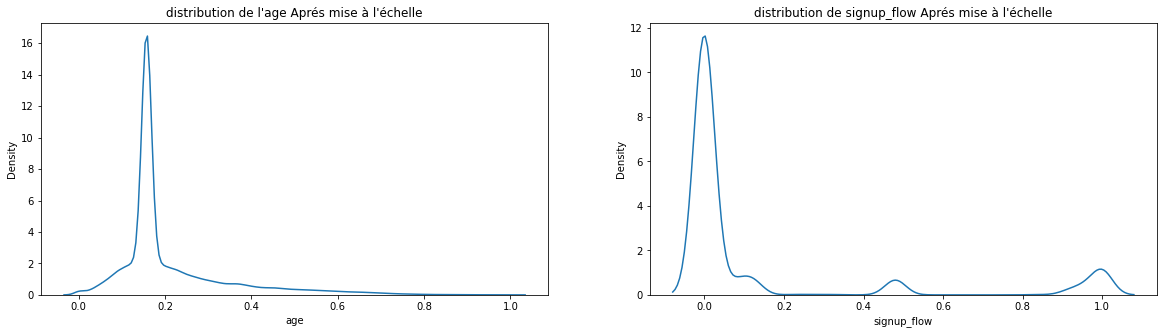

In [24]:
# Plots (aprés mise à l'échelle)
figures, (cx1, cx2) = plt.subplots(ncols=2, figsize=(20,5))

cx1.set_title("distribution de l'age Aprés mise à l'échelle")
sns.kdeplot(df_train_echelle["age"], ax=cx1)

cx2.set_title("distribution de signup_flow Aprés mise à l'échelle")
sns.kdeplot(df_train_echelle["signup_flow"], ax= cx2)

plt.show()

In [25]:
# Remplacement par les nouvelles valeurs transformées
df_train["signup_flow"] = df_train_echelle["signup_flow"]
df_train["age"] = df_train_echelle["age"]
df_train.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,2009-03-19 04:32:55,-unknown-,0.157143,facebook,0.00,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,2009-05-23 17:48:09,MALE,0.271429,facebook,0.00,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,2009-06-09 23:12:47,FEMALE,0.528571,basic,0.12,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,2009-10-31 06:01:29,FEMALE,0.328571,facebook,0.00,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,2009-12-08 06:11:05,-unknown-,0.314286,basic,0.00,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210063 entries, 0 to 210062
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date_account_created     210063 non-null  datetime64[ns]
 1   timestamp_first_active   210063 non-null  datetime64[ns]
 2   gender                   210063 non-null  object        
 3   age                      210063 non-null  float64       
 4   signup_method            210063 non-null  object        
 5   signup_flow              210063 non-null  float64       
 6   language                 210063 non-null  object        
 7   affiliate_channel        210063 non-null  object        
 8   affiliate_provider       210063 non-null  object        
 9   first_affiliate_tracked  210063 non-null  object        
 10  signup_app               210063 non-null  object        
 11  first_device_type        210063 non-null  object        
 12  first_browser   

### Enregistrer le data train dans un csv

In [27]:
df_train.to_csv("df_train_out")

## 5) Applications les mêmes transformations de données de train sur des données de test

In [28]:
# lecture de la base données test
df_test = pd.read_csv('test_users - test_users.csv')
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [30]:
# Afficher les doublons s'ils existent !
df_test[df_test[['id']].duplicated() == True]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser


In [31]:
# Drope 'id'
df_test = df_test.drop(columns=["id"], axis = 1)

### 5.1) Convertir les dates  (objets vers dates): 
date_account_created, timestamp_first_active, date_first_booking

In [32]:
# Convertir le type objet vers date
df_test['date_account_created'] = pd.to_datetime(df_test['date_account_created'], format='%Y-%m-%d')
df_test['timestamp_first_active'] = pd.to_datetime(df_test['timestamp_first_active'], format='%Y%m%d%H%M%S')
df_test['date_first_booking'] = pd.to_datetime(df_test['date_first_booking'], format='%Y-%m-%d')

# Vérifier la conversion de types date
column_dates = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
df_test[column_dates].dtypes

date_account_created      datetime64[ns]
timestamp_first_active    datetime64[ns]
date_first_booking        datetime64[ns]
dtype: object

### 5.2)  Remplacer les valeurs manquantes de first_affiliate_tracked

In [33]:
# Remplacer les valeurs manquantes (Cat) de first_affiliate_tracked par "untracked"
index = df_test[df_test.first_affiliate_tracked.isnull()].index
df_test.loc[index, "first_affiliate_tracked"] = 'untracked'

### 5.3)  Remplacer les valeurs manquantes de l'age

In [34]:
# Remplacer les valeurs manquantes de l'age par le mode 
df_test["age"].fillna(df_test["age"].mode()[0], axis= 0, inplace=True)

#Converter l'Age (float vers int32)  
df_test["age"] = df_test["age"].astype(np.int32) 

### 5.4)  Supprimer la colonne date_first_booking

In [35]:
# Drope 'date_first_booking'
df_test = df_test.drop(columns=["date_first_booking"], axis = 1, )

# reset index
df_test = df_test.reset_index(drop=True)

### 5.5) Correction/Standardisation/Normalisation de données

In [36]:
# Création un dataframe pour les 2 series "age" et "signup_flow"
df_test_normal = pd.DataFrame({'age_norm': df_test["age"],
                          'signup_flow_norm': df_test["signup_flow"]
                         })

test_echelle = scaler.transform(df_test_normal)
#conversion en dataframe 
df_test_echelle = pd.DataFrame(test_echelle, columns=["age", "signup_flow"])

# Remplacement par les nouvelles valeurs transformées
df_test["signup_flow"] = df_test_echelle["signup_flow"]
df_test["age"] = df_test_echelle["age"]
df_test.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2014-07-01,2014-07-01 00:00:06,FEMALE,0.228571,facebook,0.0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,2014-07-01,2014-07-01 00:00:51,-unknown-,0.128571,basic,0.0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,2014-07-01,2014-07-01 00:01:48,-unknown-,0.128571,basic,0.0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,2014-07-01,2014-07-01 00:02:15,-unknown-,0.128571,basic,0.0,en,direct,direct,linked,Web,Windows Desktop,IE
4,2014-07-01,2014-07-01 00:03:05,-unknown-,0.128571,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_account_created     62096 non-null  datetime64[ns]
 1   timestamp_first_active   62096 non-null  datetime64[ns]
 2   gender                   62096 non-null  object        
 3   age                      62096 non-null  float64       
 4   signup_method            62096 non-null  object        
 5   signup_flow              62096 non-null  float64       
 6   language                 62096 non-null  object        
 7   affiliate_channel        62096 non-null  object        
 8   affiliate_provider       62096 non-null  object        
 9   first_affiliate_tracked  62096 non-null  object        
 10  signup_app               62096 non-null  object        
 11  first_device_type        62096 non-null  object        
 12  first_browser            62096 n

### Enregistrer le data test dans un csv

In [38]:
df_test.to_csv("df_test_out")